<a href="https://colab.research.google.com/github/muzamilmujju/Titanic-Classification/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

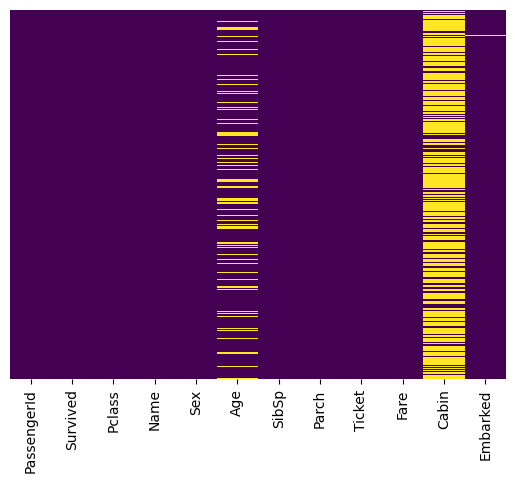

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<ipython-input-7-05742e5567b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

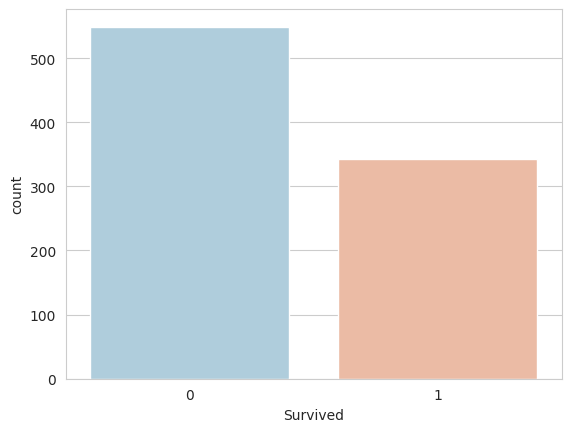

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

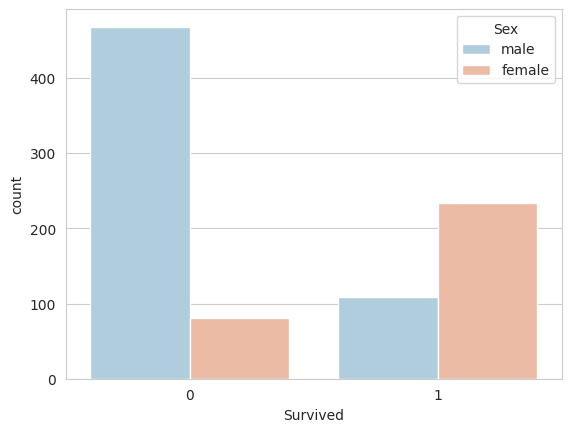

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

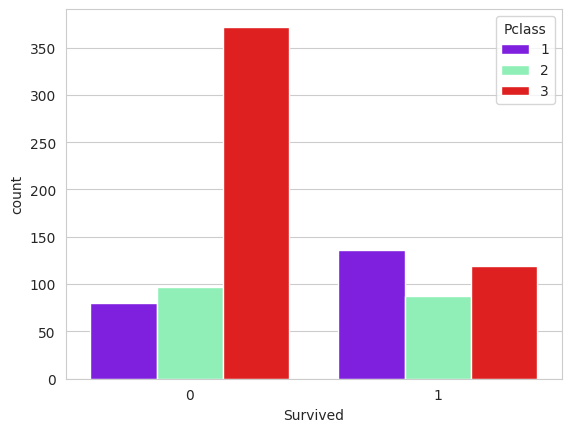

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

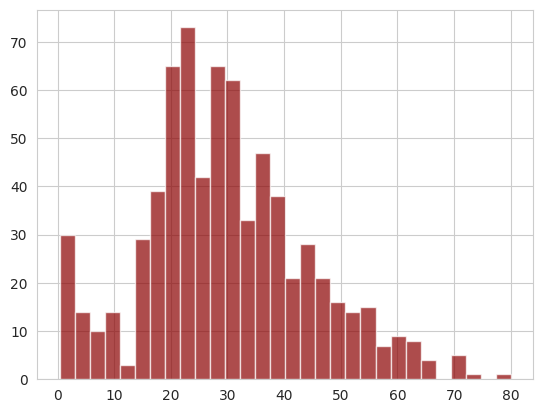

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

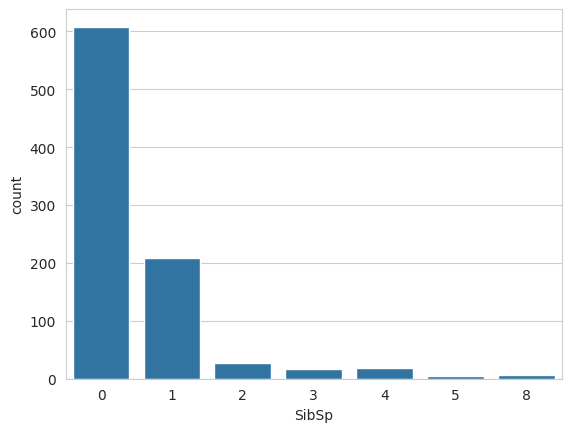

In [ ]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

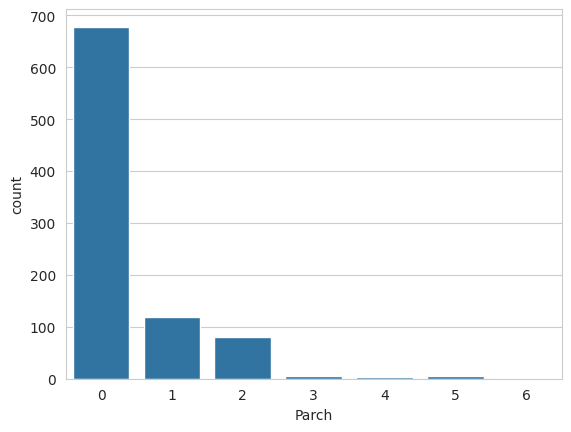

In [ ]:
sns.countplot(x='Parch',data=train)

<Axes: >

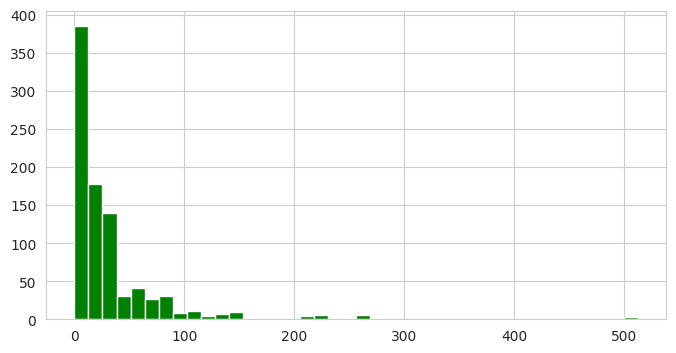

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

data cleaning


<ipython-input-14-551bc5ec5847>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

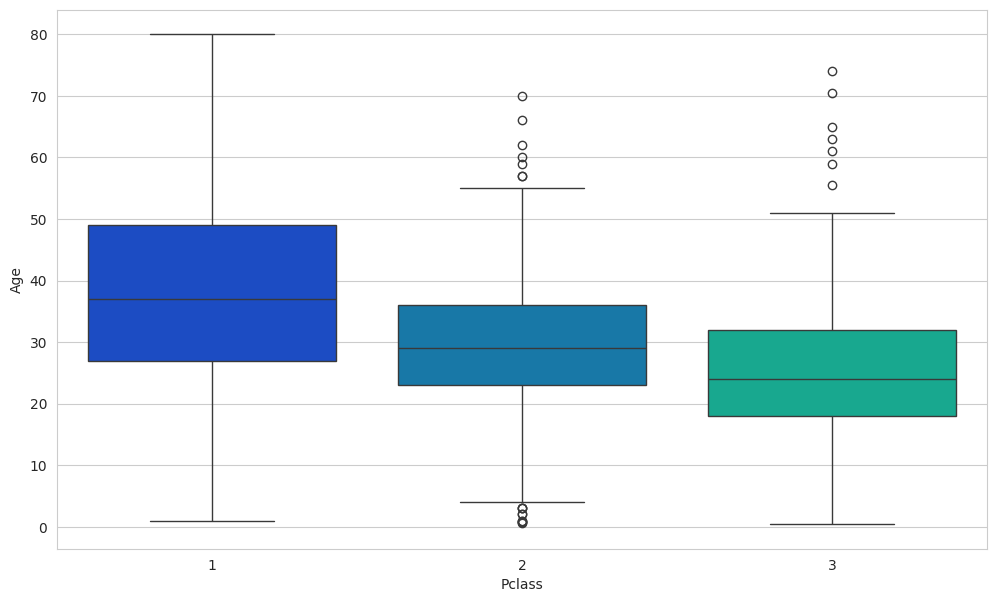

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')


<Axes: >

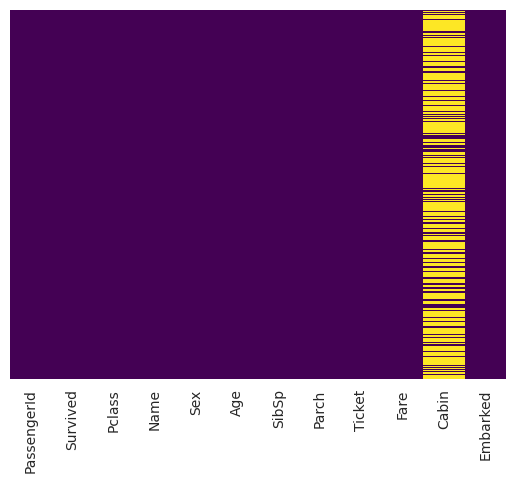

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.dropna(inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),
                                                    train['Survived'], test_size=0.10,
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,True,False,True
700,701,1,18.0,1,0,227.525,False,False,False
748,749,1,19.0,1,0,53.100,True,False,True
751,752,3,6.0,0,1,12.475,True,False,True
481,482,2,29.0,0,0,0.000,True,False,True


In [ ]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[46  5]
 [19 20]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79        51
           1       0.80      0.51      0.62        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.75      0.73      0.72        90



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[45  6]
 [15 24]]


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        51
           1       0.80      0.62      0.70        39

    accuracy                           0.77        90
   macro avg       0.78      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90



Random forest classifiaction

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
rf_pre=rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [14 25]]


In [ ]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [ ]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000)
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xg_pred = xgboost.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,xg_pred))

[[46  5]
 [15 24]]


In [ ]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.83      0.62      0.71        39

    accuracy                           0.78        90
   macro avg       0.79      0.76      0.76        90
weighted avg       0.79      0.78      0.77        90



In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

ann  = Sequential()
ann.add(Dense(units= 32, kernel_initializer= 'uniform', activation = 'relu', input_dim=9)) # Use kernel_initializer instead of init
ann.add(Dense(units= 32, kernel_initializer= 'uniform', activation = 'relu')) # Use kernel_initializer instead of init
ann.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid')) # Use kernel_initializer instead of init
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [74]:
import numpy as np  # Import numpy for array manipulation

# Convert X_train and y_train to float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

ann.fit(X_train,y_train, batch_size=32, epochs=300,verbose= 0) # Change nb_epoch to epochs

In [76]:
import numpy as np  # Import numpy for array manipulation

# Convert X_test to float32
X_test = X_test.astype(np.float32)

ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 8ms/step
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]


In [77]:
print(confusion_matrix(y_test,ann_pred))

[[47  4]
 [16 23]]


In [78]:
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82        51
           1       0.85      0.59      0.70        39

    accuracy                           0.78        90
   macro avg       0.80      0.76      0.76        90
weighted avg       0.79      0.78      0.77        90



In [79]:
test = pd.read_csv('/content/test.csv')

<Axes: >

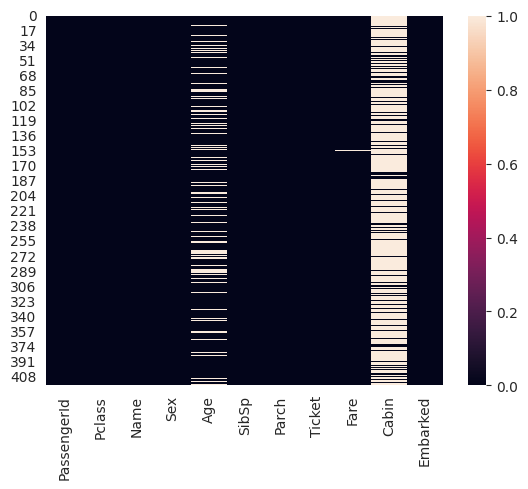

In [80]:
sns.heatmap(test.isnull())

In [81]:
test.drop('Cabin',axis=1,inplace=True)

In [82]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [85]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [86]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test= pd.get_dummies(test['Embarked'],drop_first=True)

In [87]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [88]:
test = pd.concat([test,sex_test,embark_test],axis=1)

In [89]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [90]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [94]:
import pandas as pd
train = train.astype(float)

ann.fit(train.drop(['Survived'],axis=1),train['Survived'] , epochs=300,verbose= 0)

In [96]:
import pandas as pd

# Cast all columns of 'test' to float
test = test.astype(float)

test_prediction = ann.predict(test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

14/14 [==============================] - 0s 3ms/step


In [97]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [98]:
new_test = pd.concat([test, test_pred], axis=1, join='inner')

In [99]:
new_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0
2,894.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0
4,896.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0


In [100]:
df= new_test[['PassengerId' ,'Survived']]

In [103]:
df.head()

,PassengerId,Survived
0,892.0,0
1,893.0,0
2,894.0,0
3,895.0,0
4,896.0,0
